In [42]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [45]:
df.drop('CustomerID',axis=1,inplace = True)

In [46]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [47]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [48]:
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [49]:
fig1 = px.scatter(df1 , x='Annual Income (k$)',y='Spending Score (1-100)',color='Age')
fig1.show()

In [50]:
df1.sort_values('Gender').head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
7,Female,23,18,94,1
118,Female,51,67,43,3
119,Female,50,67,57,3
73,Female,60,50,56,3
72,Female,60,50,49,3


In [51]:
fig7 = px.histogram(df1, x="Spending Score (1-100)",nbins=15,color='Gender')
fig7.show()

In [53]:
fig2 = px.histogram(df1, x = 'Age',y='Spending Score (1-100)',nbins=15,color='Gender')
fig2.show()

In [54]:
fig3 = px.histogram(df1, x = 'Age',y='Annual Income (k$)',nbins=15,color='Gender')
fig3.show()

In [55]:
fig15 = px.scatter(df1,x='Annual Income (k$)',y='Spending Score (1-100)',color='Gender')
fig15.show()

In [56]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [57]:
fig25 = px.pie(df1,names='Gender')
fig25.show()

In [58]:
df7= df1[df1['Gender'] == 'Male']
df7

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
178,Male,59,93,14,0
138,Male,19,74,10,0
176,Male,58,88,15,0
162,Male,19,81,5,0
170,Male,40,87,13,0
...,...,...,...,...,...
128,Male,59,71,11,4
70,Male,70,49,55,4
32,Male,53,33,4,4
92,Male,48,60,49,4


In [59]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [60]:
df1 = df.copy()

In [61]:
from sklearn.preprocessing import StandardScaler
X = df.copy()
X = StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

In [62]:
from sklearn.cluster import KMeans #12
kmeans = KMeans(init="k-means++",n_clusters=5,n_init=50)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=50)

In [63]:
lables = kmeans.labels_
lables[0:5]

array([2, 2, 0, 3, 0])

In [64]:
df['cluster'] = lables
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0


In [65]:
df.groupby('cluster').mean().sort_values('Annual Income (k$)',ascending=False)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
1,0.566667,39.866667,90.500000,16.100000
2,1.000000,28.250000,62.000000,71.675000
3,0.000000,28.345455,60.800000,68.654545
4,1.000000,55.903226,48.774194,38.806452
0,0.000000,48.909091,46.840909,38.886364


In [66]:
df['Gender']=df['Gender'].map({1:'Male',0:'Female'})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


In [67]:
df1 = df.sort_values('cluster', ascending=True)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
96,Female,47,60,47,0
34,Female,49,33,14,0
36,Female,42,34,17,0
121,Female,38,67,40,0
160,Female,56,79,35,0


In [68]:
df.groupby(['cluster','Gender']).mean().sort_values('Spending Score (1-100)',ascending=False)

Age  Annual Income (k$)  Spending Score (1-100)
cluster Gender                                                       
2       Male    28.250000           62.000000               71.675000
3       Female  28.345455           60.800000               68.654545
0       Female  48.909091           46.840909               38.886364
4       Male    55.903226           48.774194               38.806452
1       Female  42.769231           94.692308               21.846154
        Male    37.647059           87.294118               11.705882

In [69]:
fig = px.scatter_3d(df,x='cluster',y='Age',z='Spending Score (1-100)',color = 'Annual Income (k$)')
fig.show()

In [72]:
fig = px.scatter(df,x='cluster',y='Spending Score (1-100)',color = 'Annual Income (k$)')
fig.show()

### the elbow method

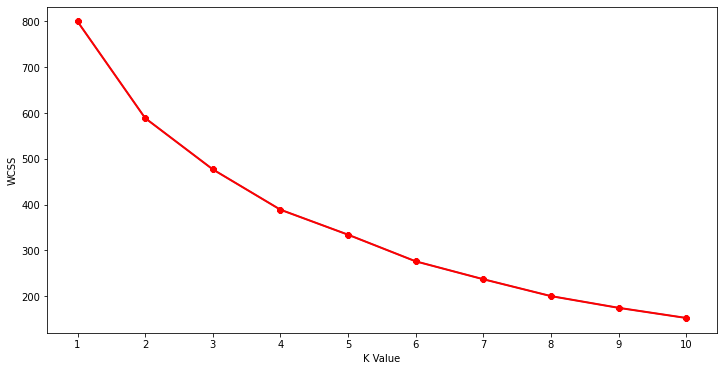

In [71]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()